In [1]:
import networkx as nx

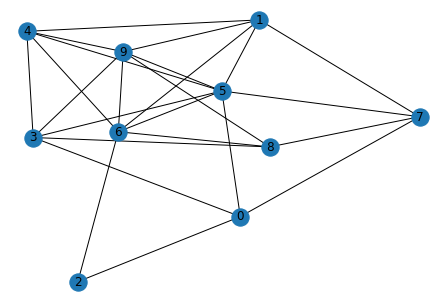

In [2]:
G = nx.erdos_renyi_graph(10, 0.5)
nx.draw(G, with_labels=True)

In [3]:
# apply function func(u, v) to each edge
def _apply_prediction(G, func, ebunch=None):
    # list of edges
    if ebunch is None:
        # list of non edges in G
        ebunch = nx.non_edges(G)

    # loop through all edges, apply func to each pair of nodes (edge)
    return ((u, v, func(u, v)) for u, v in ebunch)

In [4]:
# resource allocation index
def resource_allocation_index(G):
    # apply to each pair of node
    def predict(u, v):
        # common 1-hop neighbors between u and v 
        cn = nx.common_neighbors(G, u, v)    
        return sum(1/ G.degree(w) for w in cn)

    return _apply_prediction(G, predict)

list(resource_allocation_index(G))

[(0, 1, 0.39285714285714285),
 (0, 4, 0.34285714285714286),
 (0, 6, 0.6428571428571428),
 (0, 8, 0.45),
 (0, 9, 0.34285714285714286),
 (1, 8, 0.5833333333333333),
 (1, 2, 0.16666666666666666),
 (1, 3, 0.5095238095238095),
 (2, 3, 0.25),
 (2, 4, 0.16666666666666666),
 (2, 5, 0.41666666666666663),
 (2, 7, 0.25),
 (2, 8, 0.16666666666666666),
 (2, 9, 0.16666666666666666),
 (3, 6, 0.7595238095238095),
 (3, 7, 0.6428571428571428),
 (4, 8, 0.5333333333333333),
 (4, 7, 0.34285714285714286),
 (5, 8, 0.7833333333333333),
 (6, 7, 0.5928571428571429),
 (7, 9, 0.5928571428571429)]

In [5]:
# jaccard coefficient

def jaccard_coefficient(G):
    def predict(u, v):
        # get union of neighbors of u and v
        union_size = len(set(G[u]) | set(G[v]))

        if union_size == 0:
            return 0

        # get common neighbors
        cn = list(nx.common_neighbors(G, u, v))
        cn_size = len(cn)

        return cn_size / union_size

    return _apply_prediction(G, predict)

list(jaccard_coefficient(G))

[(0, 1, 0.2857142857142857),
 (0, 4, 0.2857142857142857),
 (0, 6, 0.25),
 (0, 8, 0.3333333333333333),
 (0, 9, 0.25),
 (1, 8, 0.5),
 (1, 2, 0.16666666666666666),
 (1, 3, 0.42857142857142855),
 (2, 3, 0.16666666666666666),
 (2, 4, 0.16666666666666666),
 (2, 5, 0.2857142857142857),
 (2, 7, 0.2),
 (2, 8, 0.2),
 (2, 9, 0.14285714285714285),
 (3, 6, 0.5714285714285714),
 (3, 7, 0.5),
 (4, 8, 0.5),
 (4, 7, 0.2857142857142857),
 (5, 8, 0.5714285714285714),
 (6, 7, 0.42857142857142855),
 (7, 9, 0.42857142857142855)]

In [6]:
from math import log

In [7]:
# adamic adar index
def adamic_adar_index(G):
    # apply to each pair of node
    def predict(u, v):
        # common 1-hop neighbors between u and v 
        cn = nx.common_neighbors(G, u, v)    
        return sum(1/ log(G.degree(w)) for w in cn)

    return _apply_prediction(G, predict)

list(adamic_adar_index(G))

[(0, 1, 1.2352458628142324),
 (0, 4, 1.1352332769293625),
 (0, 6, 1.9565933832587141),
 (0, 8, 1.3426824550040934),
 (0, 9, 1.1352332769293625),
 (1, 8, 1.8375687735469761),
 (1, 2, 0.5581106265512472),
 (1, 3, 1.6933439034806097),
 (2, 3, 0.7213475204444817),
 (2, 4, 0.5581106265512472),
 (2, 5, 1.279458146995729),
 (2, 7, 0.7213475204444817),
 (2, 8, 0.5581106265512472),
 (2, 9, 0.5581106265512472),
 (3, 6, 2.4146914239250914),
 (3, 7, 1.9565933832587141),
 (4, 8, 1.7375561876621062),
 (4, 7, 1.1352332769293625),
 (5, 8, 2.458903708106588),
 (6, 7, 1.8565807973738442),
 (7, 9, 1.8565807973738442)]

In [8]:
def preferential_attachment(G):
    def predict(u, v):
        return G.degree(u) * G.degree(v)

    return _apply_prediction(G, predict)

list(preferential_attachment(G))

[(0, 1, 20),
 (0, 4, 20),
 (0, 6, 24),
 (0, 8, 16),
 (0, 9, 24),
 (1, 8, 20),
 (1, 2, 10),
 (1, 3, 25),
 (2, 3, 10),
 (2, 4, 10),
 (2, 5, 14),
 (2, 7, 8),
 (2, 8, 8),
 (2, 9, 12),
 (3, 6, 30),
 (3, 7, 20),
 (4, 8, 20),
 (4, 7, 20),
 (5, 8, 28),
 (6, 7, 24),
 (7, 9, 24)]

In [9]:
def _community(G, u, community="community"):
    node_u = G.nodes[u]

    return node_u[community]

In [10]:
# list(nx.algorithms.link_prediction.cn_soundarajan_hopcroft(G))

In [11]:
def cn_soundarajan_hopcroft(G):

    # assign community (in practice needs to run community detection first)
    for n in G.nodes():
        G.nodes[n]["community"] = 0

    def predict(u, v):
        # find community of u and v
        Cu = _community(G, u, "community")
        Cv = _community(G, v, "community")

        # find common neighbors of u and v
        cnbors = list(nx.common_neighbors(G, u, v))

        # check community of each common neighbor is same as Cu
        checkCommunity = [_community(G, w, "community") == Cu for w in cnbors]
        # if u and v belong to the same community, output sum of common neighbors otherwise 0
        neighbors = (
            sum(checkCommunity) if Cu == Cv else 0
        )

        return len(cnbors) + neighbors

    return _apply_prediction(G, predict)

list(cn_soundarajan_hopcroft(G))

[(0, 1, 4),
 (0, 4, 4),
 (0, 6, 4),
 (0, 8, 4),
 (0, 9, 4),
 (1, 8, 6),
 (1, 2, 2),
 (1, 3, 6),
 (2, 3, 2),
 (2, 4, 2),
 (2, 5, 4),
 (2, 7, 2),
 (2, 8, 2),
 (2, 9, 2),
 (3, 6, 8),
 (3, 7, 6),
 (4, 8, 6),
 (4, 7, 4),
 (5, 8, 8),
 (6, 7, 6),
 (7, 9, 6)]

In [12]:
# ra_index_soundarajan_hopcroft
def ra_index_soundarajan_hopcroft(G):

    # assign community (in practice needs to run community detection first)
    for n in G.nodes():
        G.nodes[n]["community"] = 0

    def predict(u, v):
        # find community of u and v
        Cu = _community(G, u, "community")
        Cv = _community(G, v, "community")

        # if both links are not in the same community, set to 0
        if Cu != Cv:
            return 0

        # find common neighbors of u and v
        cnbors = list(nx.common_neighbors(G, u, v))

        # check inverseDeg of every common neighbor if it's in the same neighbor with u
        inverseDeg = [1/G.degree(w) for w in cnbors if _community(G, w, "community") == Cu]

        return sum(inverseDeg)

    return _apply_prediction(G, predict)

list(ra_index_soundarajan_hopcroft(G))

[(0, 1, 0.39285714285714285),
 (0, 4, 0.34285714285714286),
 (0, 6, 0.6428571428571428),
 (0, 8, 0.45),
 (0, 9, 0.34285714285714286),
 (1, 8, 0.5833333333333333),
 (1, 2, 0.16666666666666666),
 (1, 3, 0.5095238095238095),
 (2, 3, 0.25),
 (2, 4, 0.16666666666666666),
 (2, 5, 0.41666666666666663),
 (2, 7, 0.25),
 (2, 8, 0.16666666666666666),
 (2, 9, 0.16666666666666666),
 (3, 6, 0.7595238095238095),
 (3, 7, 0.6428571428571428),
 (4, 8, 0.5333333333333333),
 (4, 7, 0.34285714285714286),
 (5, 8, 0.7833333333333333),
 (6, 7, 0.5928571428571429),
 (7, 9, 0.5928571428571429)]

In [13]:
# within inter cluster
def within_inter_cluster(G, ebunch=None, delta=0.001, community="community"):

    # assign community (in practice needs to run community detection first)
    for n in G.nodes():
        G.nodes[n]["community"] = 0

    def predict(u, v):
        # find community of u and v
        Cu = _community(G, u, "community")
        Cv = _community(G, v, "community")

        # if both links are not in the same community, set to 0
        if Cu != Cv:
            return 0

        # find common neighbors of u and v
        cnbors = set(nx.common_neighbors(G, u, v))

        # find neighbors belonging to the same community with u
        within = {w for w in cnbors if _community(G, w, community) == Cu}

        # neighbors not belonging to within
        inter = cnbors - within

        # within common neighbors (ratio of neighbors that belong to the same community / those that don't)
        return len(within) / (len(inter) + delta)

    return _apply_prediction(G, predict)

list(within_inter_cluster(G))

[(0, 1, 2000.0),
 (0, 4, 2000.0),
 (0, 6, 2000.0),
 (0, 8, 2000.0),
 (0, 9, 2000.0),
 (1, 8, 3000.0),
 (1, 2, 1000.0),
 (1, 3, 3000.0),
 (2, 3, 1000.0),
 (2, 4, 1000.0),
 (2, 5, 2000.0),
 (2, 7, 1000.0),
 (2, 8, 1000.0),
 (2, 9, 1000.0),
 (3, 6, 4000.0),
 (3, 7, 3000.0),
 (4, 8, 3000.0),
 (4, 7, 2000.0),
 (5, 8, 4000.0),
 (6, 7, 3000.0),
 (7, 9, 3000.0)]

In [14]:
def common_neighbor_centrality(G, alpha=0.8):
    # all pairs shortest paths
    shortest_path = nx.shortest_path(G)

    def predict(u, v):
        # find common neighbors
        cnbors = list(nx.common_neighbors(G, u, v))

        # shortest paths
        sp = shortest_path[u][v]

        # number of nodes
        n = G.number_of_nodes()

        # centrality
        val = alpha * len(cnbors) + (1-alpha) * n / (len(sp)-1)

        return val

    return _apply_prediction(G, predict)

list(common_neighbor_centrality(G))

[(0, 1, 2.5999999999999996),
 (0, 4, 2.5999999999999996),
 (0, 6, 2.5999999999999996),
 (0, 8, 2.5999999999999996),
 (0, 9, 2.5999999999999996),
 (1, 8, 3.4000000000000004),
 (1, 2, 1.7999999999999998),
 (1, 3, 3.4000000000000004),
 (2, 3, 1.7999999999999998),
 (2, 4, 1.7999999999999998),
 (2, 5, 2.5999999999999996),
 (2, 7, 1.7999999999999998),
 (2, 8, 1.7999999999999998),
 (2, 9, 1.7999999999999998),
 (3, 6, 4.2),
 (3, 7, 3.4000000000000004),
 (4, 8, 3.4000000000000004),
 (4, 7, 2.5999999999999996),
 (5, 8, 4.2),
 (6, 7, 3.4000000000000004),
 (7, 9, 3.4000000000000004)]

[5]